# CS5920J Assignment 2

In [145]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

#### 1. Load the scikit-learn version of the diabetes dataset into your Jupyter notebook using the load_diabetes function

In [146]:
diabetes = load_diabetes()

In [147]:
diabetes['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [148]:
diabetes['data'].shape

(442, 10)

In [149]:
diabetes['target'].shape

(442,)

#### 2. Split the dataset into the training and test sets. Use the birthday as random_state

In [150]:
X_train,X_test,y_train,y_test = train_test_split(diabetes['data'],diabetes['target'],random_state=924)

In [151]:
lasso = Lasso().fit(X_train,y_train)

In [152]:
lasso.score(X_train,y_train)

0.33136976908707216

In [153]:
lasso.score(X_test,y_test)

0.3647028503815978

In [154]:
import numpy as np
np.sum(lasso.coef_ != 0)

3

In [155]:
lasso.coef_

array([  0.        ,  -0.        , 347.27189013,  34.41290304,
         0.        ,   0.        ,  -0.        ,   0.        ,
       254.56728939,   0.        ])

#### 3. Answers for question 3
3-1) What is the training $R^2$ for the Lasso model using the default parameters?: 0.33136976908707216 <br>
3-2) What is the test $R^2$ for the Lasso model using the default parameters?: 0.3647028503815978 <br>
3-3) How many features does this model use?: 3 <br>
3-4) What are the names of those features?: bmi, bp, s5

#### 4. Load the original diabetes dataset from the web page

In [184]:
ori_diabetes_data = np.genfromtxt("diabetes.txt", skip_header=1, usecols=np.arange(10))
ori_diabetes_label = np.genfromtxt("diabetes.txt", skip_header=1, usecols=10)

In [185]:
ori_diabetes_data.shape

(442, 10)

In [186]:
ori_diabetes_label.shape

(442,)

#### 5. Split the dataset into the training and test sets. Use the birtyday as random_state

In [187]:
ori_X_train,ori_X_test,ori_y_train,ori_y_test = train_test_split(ori_diabetes_data,ori_diabetes_label,random_state=924)

In [188]:
lasso = Lasso().fit(ori_X_train,ori_y_train)

In [189]:
lasso.score(ori_X_train, ori_y_train)

0.49532094051593256

In [190]:
lasso.score(ori_X_test, ori_y_test)

0.540587068916375

In [191]:
np.sum(lasso.coef_ != 0)

9

In [192]:
lasso.coef_

array([  0.12356884, -19.75719429,   5.48772619,   1.20858765,
         0.        ,  -0.10859985,  -1.1636105 ,   0.09473498,
        32.86165311,   0.16674242])

#### 6. Answers for question 6
6-1) What is the training $R^2$ for the Lasso model using the default parameters?: 0.49532094051593256 <br>
6-2) What is the test $R^2$ for the Lasso model using the default parameters?: 0.540587068916375 <br>
6-3) How many features does this model use?: 9 <br>
6-4) What are the names of those features?: age, sex, bmi, bp, s2, s3, s4, s5, s6 <br>
6-5) Differences:<br> Compared to the results in question 3, both training $R^2$ and test $R^2$ show better prediction with original (unnormalized) datasets. It implicates that normalization not always lead to increased model performance. Also, the number of features used in the model, 9 out of 10, is larger than the previous result. It means that the model worked poorly in model selection and it may give an unclear message in what features are meaningfully affect the prediction.

#### 7. Preprocess the training and test sets in the same way and avoiding data snooping. Use StandardScaler

In [194]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(ori_X_train)

In [195]:
X_train_scaled = scaler.transform(ori_X_train)
X_test_scaled = scaler.transform(ori_X_test)

In [196]:
lasso = Lasso().fit(X_train_scaled,ori_y_train)

In [197]:
lasso.score(X_train_scaled,ori_y_train)

0.4966937585120621

In [198]:
lasso.score(X_test_scaled,ori_y_test)

0.5448174343671084

In [199]:
np.sum(lasso.coef_ != 0)

8

In [200]:
lasso.coef_

array([  0.61370551, -10.37822308,  23.10560775,  15.85644628,
        -2.92711112,  -0.        , -13.14573   ,   0.        ,
        20.84392378,   0.85901202])

#### 8. Answers for question 8
8-1) What is the training $R^2$ for the Lasso model using the default parameters?: 0.4966937585120621 <br>
8-2) What is the test $R^2$ for the Lasso model using the default parameters?: 0.5448174343671084 <br>
8-3) How many features does this model use?: 8 <br>
8-4) What are the names of those features?: age, sex, bmi, bp, s1, s3, s5, s6 <br>
8-5) Are your current results closer to those in item 3 or item 6?: It's closer to those in item 6 <br>
8-6) Is this expectation confirmed? <br>
No, expected results have to be closer to those in item 3 as the data has been normalized with StandardScale, however, the results are closer to ones with unnormalized datasets. <br>
8-7) Why? <br>
Normalization method is different. I normalized the dataset using StandardScaler (mean centered and scaled by the standard deviation). However, scikit-learn version of the diabetes dataset is normalized by mean centered and scaled by the standard deviation <u>times 'n_samples'</u>.

#### 9. Varying the parameter α in the Lasso, plot the test $R^2$ vs the number of features used

In [201]:
alpha_list = [0.01, 0.1, 1, 5, 10, 20, 30, 40, 50]

In [202]:
testr2_list = []
n_features_list = []
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=100000).fit(X_train_scaled, ori_y_train)
    testr2 = lasso.score(X_test_scaled, ori_y_test)
    n_features = np.sum(lasso.coef_ != 0)
    testr2_list.append(testr2)
    n_features_list.append(n_features)

In [203]:
print(testr2_list)
print(n_features_list)

[0.5454628093234413, 0.5471687839202721, 0.5448174343671084, 0.5213247388186935, 0.4847385793486172, 0.3809469022984818, 0.23682526963359818, 0.05540866162181235, -0.0020858023930971914]
[10, 9, 8, 5, 4, 3, 2, 1, 0]


Text(0.5, 1.0, 'test R^2 vs number of features used')

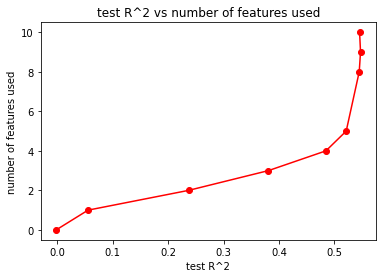

In [204]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(testr2_list, n_features_list, color='r', marker='o')
plt.xlabel('test R^2')
plt.ylabel('number of features used')
plt.title('test R^2 vs number of features used')

#### Which point on the curve do you prefer? <br>
I prefer the result based on the alpha = 5 (sixth point from the left side). It used 5 features, which are half of the number of total features, and the value of test $R^2$ also seems reasonable (0.5213247388186935).

#### 10. Choose the regularization parameter for the Lasso using cross-validation on the training set

In [224]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 50]}

In [225]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(Lasso(), param_grid, cv=5)

In [226]:
grid_search.fit(X_train_scaled, ori_y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 50]})

In [227]:
grid_search.score(X_train_scaled, ori_y_train)

0.5031571982785852

In [228]:
grid_search.score(X_test_scaled, ori_y_test)

0.5454628093234413

In [229]:
print(grid_search.best_params_) # Selected regularization parameter for Lasso is 0.01

{'alpha': 0.01}


In [230]:
lasso = Lasso(alpha=grid_search.best_params_['alpha'], max_iter=100000).fit(X_train_scaled,ori_y_train)
n_features=np.sum(lasso.coef_ != 0)
n_features

10

#### Answers for question 10
10-1) What is the training $R^2$ for the Lasso model using the default parameters?: 0.5031571982785852 <br>
10-2) What is the test $R^2$ for the Lasso model using the default parameters?: 0.5454628093234413 <br>
10-3) How many features does this model use?: 10

#### 11. Implement an inductive conformal predictor as follows:

(a) Split the training set that obtained in item 5 into two parts: calibration set of size 99 and the training set proper

In [231]:
ori_X_train,ori_X_test,ori_y_train,ori_y_test = train_test_split(ori_diabetes_data,ori_diabetes_label,random_state=924)

In [232]:
ori_X_train.shape

(331, 10)

In [233]:
X_train_pr, X_train_cali, y_train_pr, y_train_cali = train_test_split(ori_X_train, ori_y_train, test_size=99, random_state=924)

In [234]:
X_train_pr.shape

(232, 10)

In [235]:
X_train_cali.shape

(99, 10)

(b) Preprocess the training set proper, calibration set, and test set in the same way using StandardScaler

In [236]:
scaler = StandardScaler().fit(X_train_pr)

In [237]:
X_train_proper = scaler.transform(X_train_pr)
X_train_calibration = scaler.transform(X_train_cali)
X_test_scaled = scaler.transform(ori_X_test)

(c) Using the nonconformity measure $α=|y-ŷ|$, where y is the true label and ŷ is its prediction given the training set proper

In [238]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 50]}

In [239]:
grid_search = GridSearchCV(Lasso(), param_grid, cv=5)

In [240]:
grid_search.fit(X_train_proper, y_train_pr)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 50]})

In [241]:
print(grid_search.best_params_)

{'alpha': 0.001}


In [242]:
y_hat = grid_search.predict(X_train_calibration)

In [243]:
noncs = abs(y_train_cali-y_hat)

In [244]:
sorted_noncs = np.sort(noncs)
sorted_noncs

array([  0.67431524,   2.6303268 ,   2.88621031,   3.68511019,
         4.18133308,   4.78577384,   5.42409878,   5.48895423,
         5.80060571,   5.99568389,   6.28792931,   9.35963415,
         9.91781067,  10.97524717,  11.30834286,  11.4341202 ,
        11.98399839,  12.91796012,  13.5508878 ,  13.98903639,
        15.16134616,  15.75141912,  16.99595038,  17.62201711,
        17.84886477,  18.36787425,  18.71908755,  18.91735164,
        19.04409547,  19.41138936,  19.4297827 ,  20.02506738,
        20.07855063,  22.21016322,  23.47508174,  23.58544825,
        23.5984968 ,  24.23614467,  25.99913363,  26.52652682,
        28.66768907,  30.5355208 ,  31.8403666 ,  32.10390722,
        32.83986017,  33.91778193,  34.51469418,  37.7322797 ,
        38.42433129,  39.51769723,  39.60727133,  39.71174752,
        40.04908755,  40.21316953,  40.50292086,  41.10242968,
        41.95063242,  42.16773401,  42.45510654,  43.46825105,
        44.10543553,  44.68862031,  47.59182908,  48.81

1) significance levels = 5%

In [245]:
# length of the prediction intervals = (ŷ + c) - (ŷ - c) = 2c
k_5 = np.ceil((1-0.05)*(len(X_train_calibration)+1))
c_5 = sorted_noncs[int(k_5)-1] # Index of Python starts from 0
length_5 = 2 * c_5
length_5

194.25325376124317

In [246]:
# test error rate of inductive conformal predictor
pred_test = grid_search.predict(X_test_scaled)
pred_interval_l = pred_test - c_5
pred_interval_r = pred_test + c_5

In [247]:
index = 0
n_errors = 0
for i in ori_y_test:
    if (i >= pred_interval_l[index]) & (pred_interval_r[index] >= i):
        index += 1
    else:
        n_errors += 1
        index += 1
print("test error rate:", n_errors/len(ori_y_test))

test error rate: 0.07207207207207207


2) significance levels = 20%

In [248]:
# length of the prediction intervals = (ŷ + c) - (ŷ - c) = 2c
k_20 = np.ceil((1-0.2)*(len(X_train_calibration)+1))
c_20 = sorted_noncs[int(k_20)-1] # Index of Python starts from 0
length_20 = 2 * c_20
length_20

129.67754387669925

In [249]:
# test error rate of inductive conformal predictor
pred_interval_l = pred_test - c_20
pred_interval_r = pred_test + c_20

In [250]:
index = 0
n_errors = 0
for i in ori_y_test:
    if (i >= pred_interval_l[index]) & (pred_interval_r[index] >= i):
        index += 1
    else:
        n_errors += 1
        index += 1
print("test error rate:", n_errors/len(ori_y_test))

test error rate: 0.26126126126126126


#### Answers for question 11
11-1) Length of prediction intervals at significance level of 5%: 194.25325376124317 <br>
11-2) Test error rate at significance level of 5%: 0.07207207207207207 <br>
11-3) Length of prediction intervals at significance level of 20%: 129.67754387669925 <br>
11-4) Test error rate at significance level of 20%: 0.26126126126126126